<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/230322_Omicron_Sentiment_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link

https://thecleverprogrammer.com/2021/12/06/omicron-sentiment-analysis-using-python/

In [26]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import string
import re

import nltk

from nltk.corpus import stopwords

import zipfile
from google.colab import files
import io

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
upload = files.upload()

Saving Omicron.zip to Omicron.zip


In [7]:
z = zipfile.ZipFile(io.BytesIO(upload['Omicron.zip']))
z

<zipfile.ZipFile file=<_io.BytesIO object at 0x7f3ed935c590> mode='r'>

In [11]:
z.namelist()

['omicron.csv']

In [13]:
data = pd.read_csv(z.open(z.namelist()[0]))
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1491840066506743820,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:22:43,Daily US Confirmed Covid Cases by County For M...,NaN,smcapplication,0,0,False
1,1491839660674490371,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,2009-05-10 23:01:22,639,1931,46369,False,2022-02-10 18:21:06,@Yascha_Mounk #CDC says number of fully #vacci...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0,0,False
2,1491839607368867842,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:20:54,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,0,0,False
3,1491839207169351689,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:19:18,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,2,1,False
4,1491839165608177667,Brownyard Group,"Bay Shore, NY",We offer liability coverage for the Security G...,2009-12-08 16:41:53,375,284,61,False,2022-02-10 18:19:08,With the #Beijing2022 #WinterOlympics already ...,"['Beijing2022', 'WinterOlympics', 'olympians',...",Agorapulse app,0,0,False


In [14]:
data.isnull().sum()

id                     0
user_name              0
user_location       3612
user_description    1330
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            6827
source                 0
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [15]:
data = data.dropna()

In [16]:
data.isnull().sum()

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7575 entries, 1 to 17045
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                7575 non-null   int64 
 1   user_name         7575 non-null   object
 2   user_location     7575 non-null   object
 3   user_description  7575 non-null   object
 4   user_created      7575 non-null   object
 5   user_followers    7575 non-null   int64 
 6   user_friends      7575 non-null   int64 
 7   user_favourites   7575 non-null   int64 
 8   user_verified     7575 non-null   bool  
 9   date              7575 non-null   object
 10  text              7575 non-null   object
 11  hashtags          7575 non-null   object
 12  source            7575 non-null   object
 13  retweets          7575 non-null   int64 
 14  favorites         7575 non-null   int64 
 15  is_retweet        7575 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 902.5+ KB


In [29]:
stemmer = nltk.SnowballStemmer('english')

In [ ]:
stopword = set(stopwords.words('english'))
stopword

In [31]:
def clean(text):
  text = str(text).lower()
  text = re.sub(r'\[.*?\]', '', text)
  text = re.sub(r'https?://\S+|www\.\S+', '', text)
  text = re.sub(r'<.*?>+', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub(r'\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = ' '.join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = ' '.join(text)
  return text

In [32]:
data['clean_text'] = data.text.apply(clean)

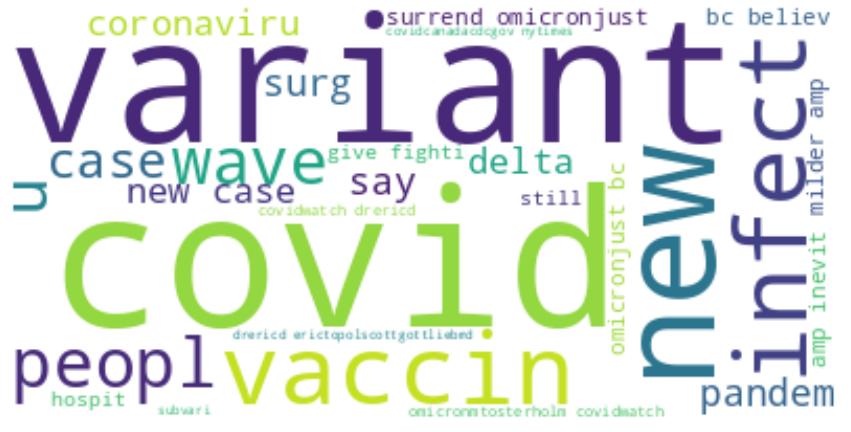

In [37]:
text = ' '.join(i for i in data.clean_text)
stopwords = set(STOPWORDS)
stopwords.add('omicron')
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

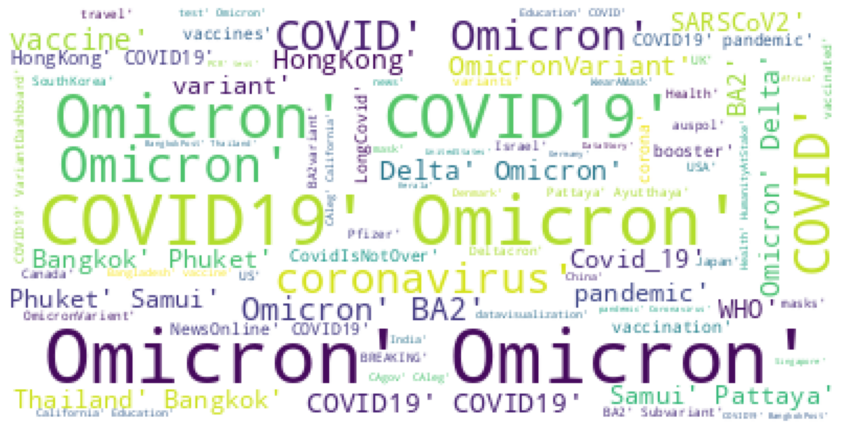

In [39]:
hasht = ' '.join(i for i in data.hashtags)
stopwords = set(STOPWORDS)
stopwords.add('Omicron')
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(hasht)
plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [40]:
sentiments = SentimentIntensityAnalyzer()
data['pos'] = [sentiments.polarity_scores(i)['pos'] for i in data.clean_text]
data['neg'] = [sentiments.polarity_scores(i)['neg'] for i in data.clean_text]
data['neu'] = [sentiments.polarity_scores(i)['neu'] for i in data.clean_text]
data['comp'] = [sentiments.polarity_scores(i)['compound'] for i in data.clean_text]

In [41]:
df = data[['clean_text', 'pos', 'neg', 'neu', 'comp']]
df.head()

,clean_text,pos,neg,neu,comp
1,yaschamounk cdc say number fulli vaccin omicro...,0.126,0.0,0.874,0.0772
4,winterolymp alreadi underway us olympian look...,0.000,0.0,1.000,0.0000
5,doctor help discov omicron say pressur reveal ...,0.213,0.0,0.787,0.4019
8,month tonga final singl doubl tappeda sickn...,0.000,0.0,1.000,0.0000
11,covid pandem continu ukrain case rapid rise du...,0.000,0.0,1.000,0.0000


In [42]:
x = sum(data.pos)
y = sum(data.neg)
z = sum(data.neu)
j = sum(data.comp)

In [43]:
def sentiment_score(a,b,c):
  if (a>b) and (a>c):
    print('Positive')
  elif (b>a) and (b>c):
    print('Negative')
  else:
    print('Neutral')

In [44]:
sentiment_score(x,y,z)

Neutral


In [45]:
print('Positive: ', x)
print('Negative: ', y)
print('Neutral: ', z)
print('Compound: ', j)

Positive:  487.614000000002
Negative:  521.6110000000003
Neutral:  6565.799999999975
Compound:  -106.39150000000113
